# Checking nPVs per Fill of Block 5

This code checks the branch "nPVs" for each fill of block 5. The nPVs is obtained for each entry, and averaged out across the fill, with the standard deviation being represented as an error bar.

The purpose is to check whether the first and second half fills of block 5 have a noticeable difference in the number of primary vertices reconstructed, which could explain the block 5 anomaly. There is clearly no noticeable pattern.

In [15]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import math

Get nPVs Values

In [16]:
# General list to hold nPVs data

def extract_nPVs_stats(file_pattern, tree_name, output_list):
    """
    Extracts mean and stddev of nPVs from ROOT files matching the pattern.

    Args:
        file_pattern (str): Glob pattern for ROOT file paths.
        tree_name (str): Name of the TTree inside the ROOT file.
        output_list (list): List to append tuples in the format (fill_number, mean, stddev).
    """
    for filepath in sorted(glob.glob(file_pattern)):
        # Extract fill number from filename
        match = re.search(r'F(\d+)', os.path.basename(filepath))
        if not match:
            continue
        fill_number = int(match.group(1))

        # Open ROOT file and get tree
        file = r.TFile.Open(filepath)
        tree = file.Get(tree_name)
        if not tree:
            print(f"Warning: No tree named '{tree_name}' in {filepath}")
            continue

        # Fill histogram and compute stats
        hist = r.TH1F("h_nPVs", "", 100, 0, 100)
        tree.Draw("nPVs >> h_nPVs", "", "goff")

        mean = hist.GetMean()
        stddev = hist.GetStdDev()

        output_list.append((fill_number, round(mean, 2), round(stddev, 2)))
        file.Close()

In [17]:
nPVs_data_b2oc_B5 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2OC_B5_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B5
)

In [18]:
nPVs_data_b2cc_B5 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2CC_B5_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B5)

In [19]:
# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B5}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B5}

# Final list of ratios with uncertainties
nPVs_data_B5 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B5.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B5:
#     print(f"    {entry},")
# print("]")

Fitting B5

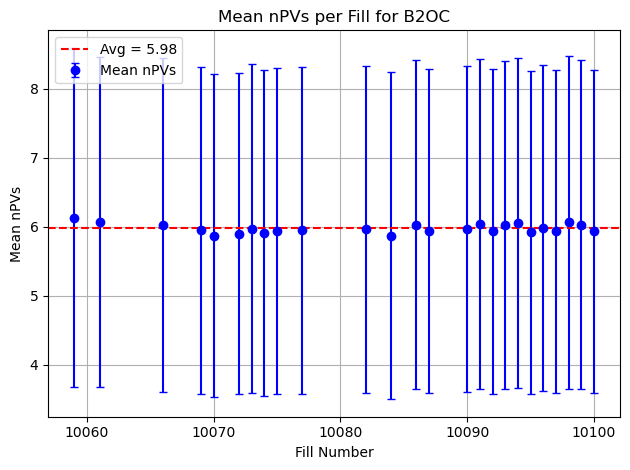

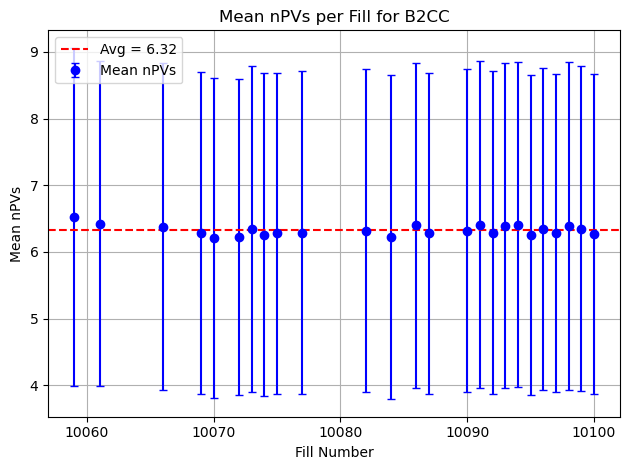

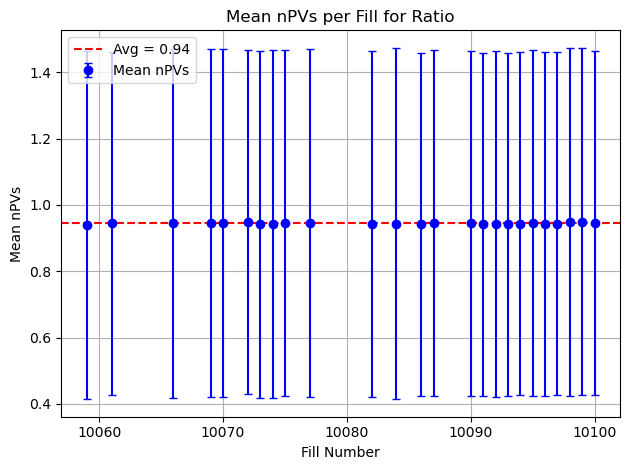

In [20]:
for nPVs_datas in [nPVs_data_b2oc_B5, nPVs_data_b2cc_B5, nPVs_data_B5]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B5 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B5 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Fitting B6

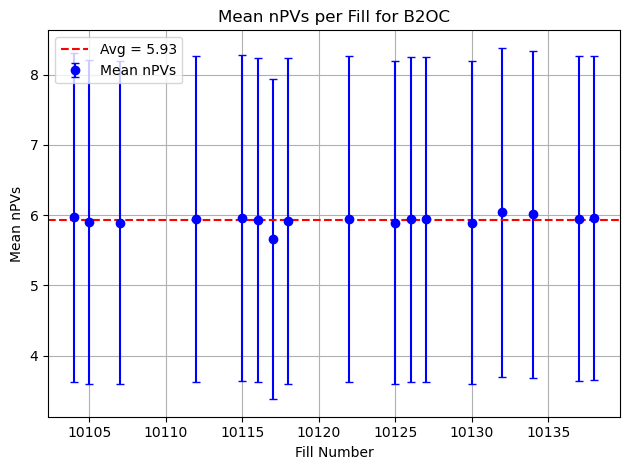

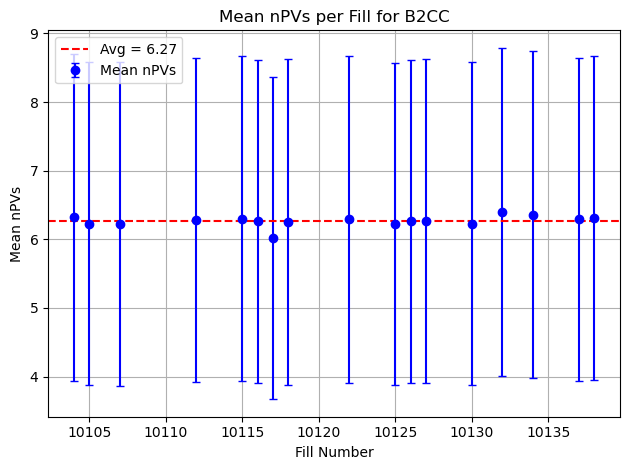

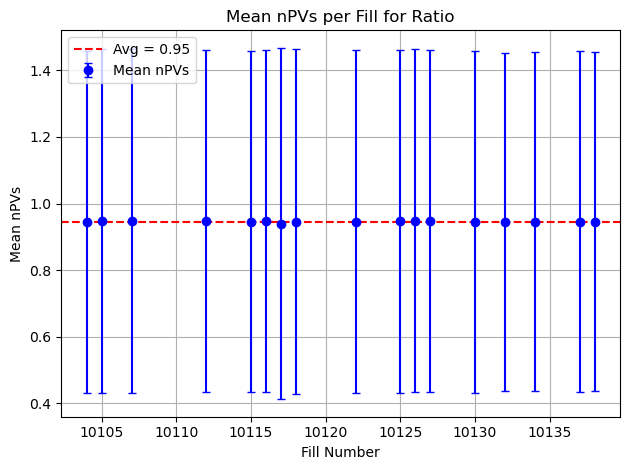

In [21]:
nPVs_data_b2oc_B6 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2OC_B6_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B6
)

# # Print result
# for entry in nPVs_data_b2oc_B6:
#     print(entry)

nPVs_data_b2cc_B6 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2CC_B6_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B6
)


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B6}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B6}

# Final list of ratios with uncertainties
nPVs_data_B6 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B6.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B6:
#     print(f"    {entry},")
# print("]")

for nPVs_datas in [nPVs_data_b2oc_B6, nPVs_data_b2cc_B6, nPVs_data_B6]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B6 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B6 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


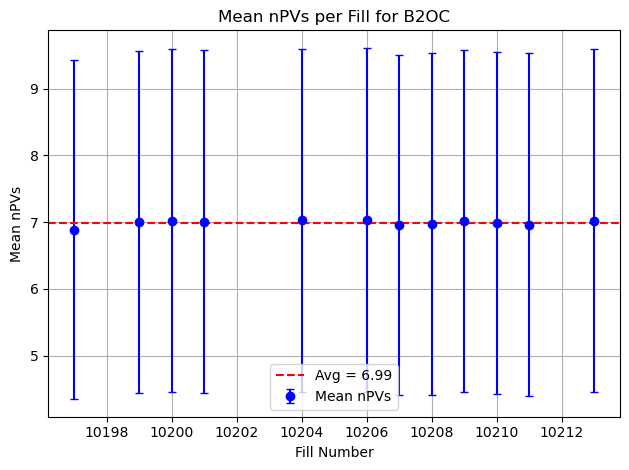

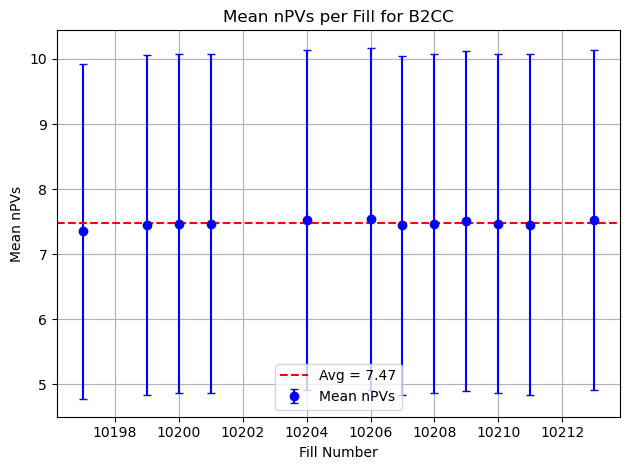

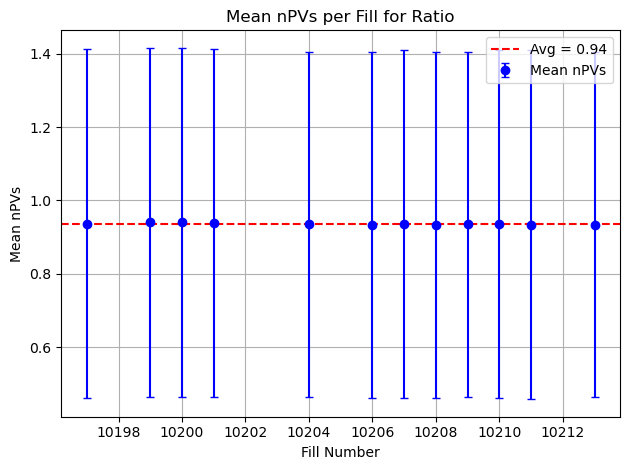

In [22]:
nPVs_data_b2oc_B7 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2OC_B7_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B7
)

# # Print result
# for entry in nPVs_data_b2oc_B7:
#     print(entry)

nPVs_data_b2cc_B7 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2CC_B7_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B7
)


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B7}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B7}

# Final list of ratios with uncertainties
nPVs_data_B7 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B7.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B7:
#     print(f"    {entry},")
# print("]")

for nPVs_datas in [nPVs_data_b2oc_B7, nPVs_data_b2cc_B7, nPVs_data_B7]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B7 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B7 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


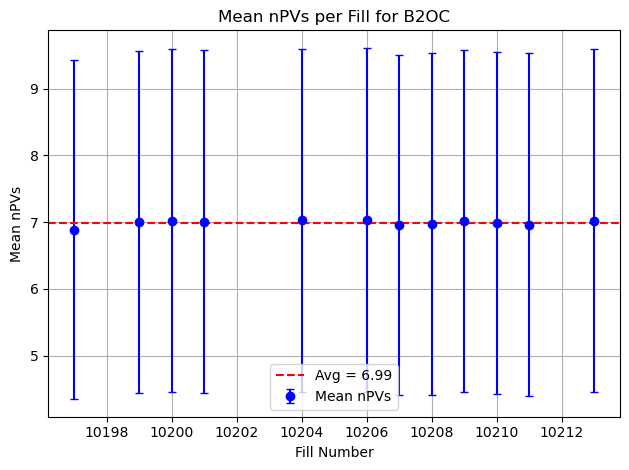

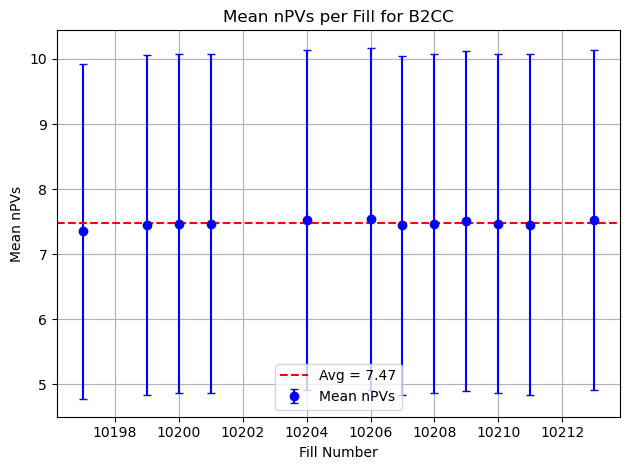

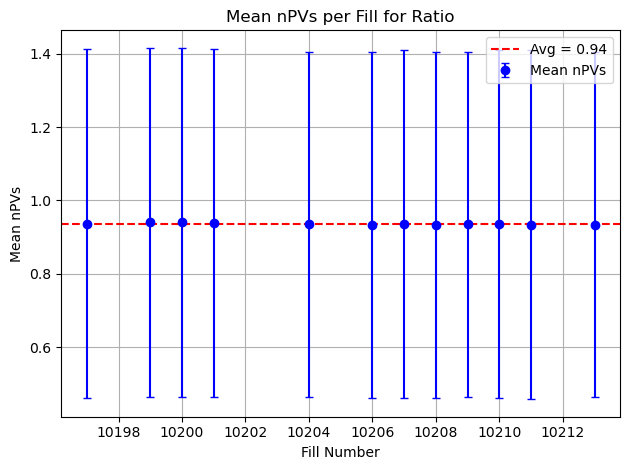

In [23]:
nPVs_data_b2oc_B8 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2OC_B7_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B8
)

# # Print result
# for entry in nPVs_data_b2oc_B8:
#     print(entry)

nPVs_data_b2cc_B8 = []
extract_nPVs_stats(
    file_pattern='./data/processed_clean_bp_p/2024_B2CC_B7_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B8
)


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B8}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B8}

# Final list of ratios with uncertainties
nPVs_data_B8 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B8.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B8:
#     print(f"    {entry},")
# print("]")

for nPVs_datas in [nPVs_data_b2oc_B8, nPVs_data_b2cc_B8, nPVs_data_B8]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B8 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B8 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Plot Histogram of nPVs for any specific fill file (if there is any suspicion of the previous plots)

Entries: 1046683
Mean nPVs: 6.42
Std dev nPVs: 2.44


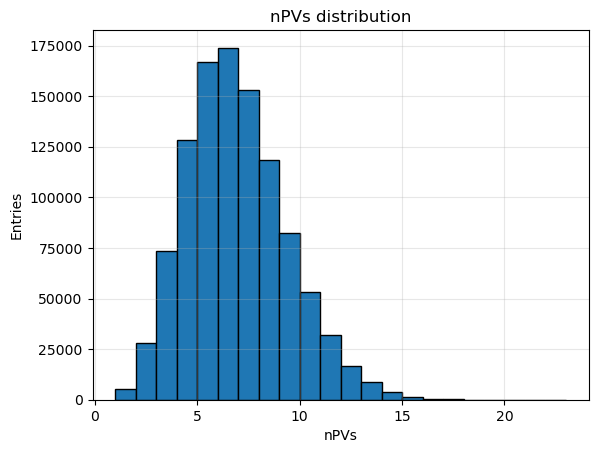

In [24]:

import ROOT
import matplotlib.pyplot as plt
import statistics as stats

# File and tree info
filepath = "./data/processed_clean_bp_p/2024_B2CC_B5_F10061.root" #Replace F10061 with whatever fill file interested in
treename = "ST-b2cc"

# Open file and get tree
file = ROOT.TFile.Open(str(filepath))
tree = file.Get(treename)

# Extract nPVs values into a list
nPVs_values = [int(getattr(entry, "nPVs")) for entry in tree]

# Stats
mean_val = stats.mean(nPVs_values)
std_val = stats.pstdev(nPVs_values)  # population std deviation
print(f"Entries: {len(nPVs_values)}")
print(f"Mean nPVs: {mean_val:.2f}")
print(f"Std dev nPVs: {std_val:.2f}")

# Plot
min_val = int(min(nPVs_values))
max_val = int(max(nPVs_values))
plt.hist(nPVs_values, bins=range(min_val, max_val + 2), edgecolor='black')

plt.xlabel("nPVs")
plt.ylabel("Entries")
plt.title("nPVs distribution")
plt.grid(True, alpha=0.3)
plt.show()


In [25]:
import ROOT as r

# Open the ROOT file and get the tree
# file = r.TFile.Open('/data/processed_clean_bp_p/2024_B2OC_UP_B5.root') # for block
file = r.TFile.Open("./data/processed_clean_bp_p/2024_B2OC_B5_F10100.root")
tree = file.Get("ST-b2oc")

# Create a histogram to fill with nPVs values
hist = r.TH1F("h_nPVs", "nPVs", 100, 0, 100)  # Adjust range/bins as needed

# Fill the histogram with nPVs values
tree.Draw("nPVs >> h_nPVs", "")  # 'goff' = graphics off

# tree.Print()

# Get mean and standard deviation
mean = hist.GetMean()
stddev = hist.GetStdDev()

print(f"Mean nPVs: {mean:.3f}")
print(f"Standard Deviation: {stddev:.3f}")



Mean nPVs: 5.929
Standard Deviation: 2.345


Unique events: 2185936
Mean nPVs: 6.23
Std dev nPVs: 2.37


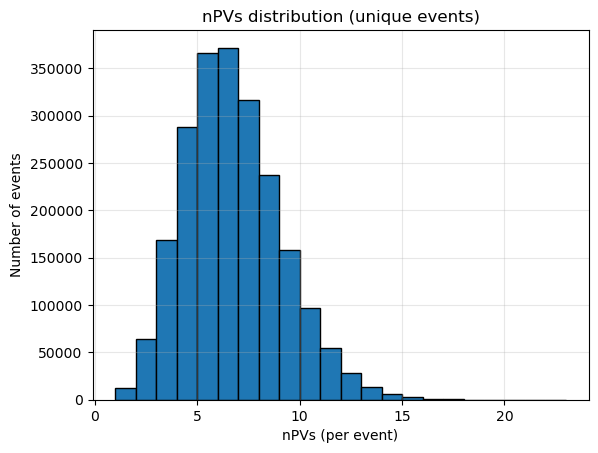

In [26]:
#Plotting per event (since event duplicates have same nPVs)
import ROOT
import matplotlib.pyplot as plt

# File and tree info
filepath = "./data/processed_clean_bp_p/2024_B2CC_B5_F10087.root"
treename = "ST-b2cc"

# Open file and get tree
file = ROOT.TFile.Open(filepath)
tree = file.Get(treename)

# Dictionary to store unique events: event -> nPVs
event_npvs = {}

for entry in tree:
    ev = int(getattr(entry, "event"))
    if ev not in event_npvs:
        event_npvs[ev] = int(getattr(entry, "nPVs"))

# Convert to list
unique_npvs = list(event_npvs.values())

# Stats
mean_val = sum(unique_npvs) / len(unique_npvs)
std_val = (sum((x - mean_val) ** 2 for x in unique_npvs) / len(unique_npvs)) ** 0.5
print(f"Unique events: {len(unique_npvs)}")
print(f"Mean nPVs: {mean_val:.2f}")
print(f"Std dev nPVs: {std_val:.2f}")

# Plot
min_val = min(unique_npvs)
max_val = max(unique_npvs)
plt.hist(unique_npvs, bins=range(min_val, max_val + 2), edgecolor='black')

plt.xlabel("nPVs (per event)")
plt.ylabel("Number of events")
plt.title("nPVs distribution (unique events)")
plt.grid(True, alpha=0.3)
plt.show()
